In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.functions as fs
%matplotlib inline

In [2]:
new_game= pd.read_csv("Output/steam_clean.csv",engine='python')

In [3]:
new_game.head()

,player_type,main_genre,recommendations,windows,mac,linux
0,Multi_player,Action,65735.0,True,True,True
1,Multi_player,Action,2802.0,True,True,True
2,Multi_player,Action,1992.0,True,True,True
3,Multi_player,Action,931.0,True,True,True
4,Multi_player,Action,4355.0,True,True,True


### Utilizando un dataset de los juegos disponibles en la plataforma Steam hemos encontrado las características que debe tener nuestro lanzamiento estrella para la campaña de navidades del 2020.
#### Algunos datos sobre steam y el porque la información de nuestra muestra es relevante. 
* Steam tiene más de 30,000 juegos en sus librerias.
* Steam es el mayor distribuidor mundial de juegos para PC, con un 75% del market share global.
* Entre un 50-70% de las descargas mundiales de juegos para PC se realizan en Steam.
#### new_game dataset
<p>Nuestro dataset cuenta con las siguientes columnas:
*Player type: si el juego es individidual o multijugador.
*Main_genre: los juegos cuenta con multiples clasificaciones, por lo que se asigno un genero principal a cada uno.
*Recommendations: el número de veces que usuarios de la plataforma steam han recomendado el juego.
*Windows, mac y linux: si el juego esta disponible en ese sistema operativo.
</p>


In [4]:
display(new_game.main_genre.value_counts().sort_values(ascending=False))

Action        12632
Casual         7140
Adventure      3345
Strategy       1718
RPG            1107
Simulation      867
Racing          340
Sports          123
Gore             46
Name: main_genre, dtype: int64

In [5]:
print(f"El porcerntaje de juegos de acción en steam es de {fs.ratio(new_game,'main_genre', 'Action')}%")
print(f"El porcerntaje de juegos casuales en steam es de {fs.ratio(new_game,'main_genre', 'Casual')}%")
print(f"El porcerntaje de juegos de aventuras en steam es de {fs.ratio(new_game,'main_genre', 'Adventure')}%")
print(f"El porcerntaje de juegos de estrategia en steam es de {fs.ratio(new_game,'main_genre', 'Strategy')}%")
print(f"El porcerntaje de juegos RPG en steam es de {fs.ratio(new_game,'main_genre', 'RPG')}%")

El porcerntaje de juegos de acción en steam es de 43.429828783607235%
El porcerntaje de juegos casuales en steam es de 24.547892456852093%
El porcerntaje de juegos de aventuras en steam es de 11.500378188819363%
El porcerntaje de juegos de estrategia en steam es de 5.906621742419033%
El porcerntaje de juegos RPG en steam es de 3.8059547548648833%


#### Teniendo en cuenta los ratios de las distintas categorías principales observamos que las categorías con mayor número de títulos de videojuegos son Acción, Casual y Aventuras.

Número de recomendaciones


main_genre
Action        13786297.0
Adventure      1553032.0
RPG            1372965.0
Strategy       1315557.0
Simulation      868125.0
Casual          866116.0
Racing          207309.0
Sports           18595.0
Gore             15071.0
Name: recommendations, dtype: float64

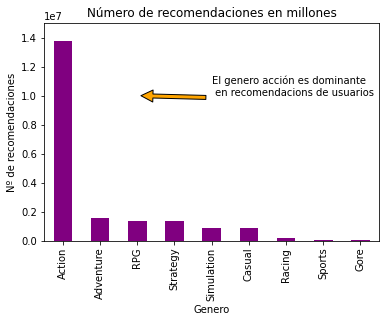

In [6]:
num_recomendations_genre = fs.group(new_game,'main_genre','recommendations').sum().sort_values(ascending=False)
num_recomendations_genre.plot.bar(color='purple')
plt.title("Número de recomendaciones en millones")
plt.ylabel("Nº de recomendaciones")
plt.xlabel("Genero")
plt.ylim((0,15000000))
print('Número de recomendaciones')
display(num_recomendations_genre)
plt.annotate("El genero acción es dominante \n en recomendacions de usuarios",xy=(2,10000000), xytext=(4,10000000),arrowprops=dict(facecolor='orange', shrink=0.05))
plt.show()

#### En cuanto a las categorías recomendadas por los usuarios, a pesar de que Casual contaba con muchos títulos, estos no son muy recomendados,  sin embargo observamos que el genero dominante en cuanto a recomendaciones de usuarios en la plataforma steam es el de Acción seguido muy de lejos por Aventuras y RPG.

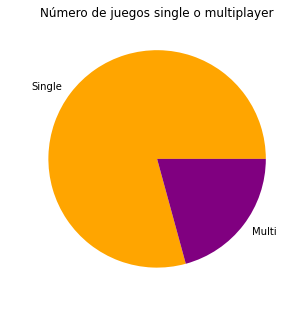

77.36711820119645 % of the games are single player
19.765522931994774 % of the games are multi player


In [7]:
player_genre=fs.group(new_game,'player_type','main_genre').count().sort_values(ascending=False)
player_genre.plot.pie(subplots=True, labels=['Single', 'Multi'], colors=['orange', 'purple'], fontsize=10, figsize=(5, 5))
plt.title("Número de juegos single o multiplayer")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()
print(f"{fs.ratio(new_game,'player_type','Single_player')} % of the games are single player")
print(f"{fs.ratio(new_game,'player_type','Multi_player')} % of the games are multi player")



#### En cuanto al número de jugadores, un 77% de los títulos son single player. 

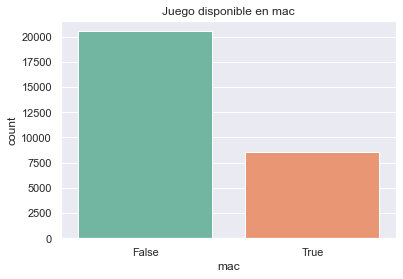

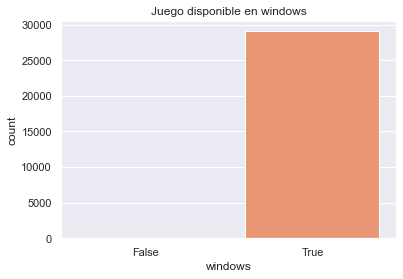

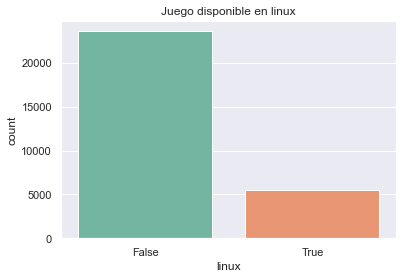

In [11]:
sns.set(style="darkgrid")
mac=fs.ccountplot('mac', new_game,'Juego disponible en mac')
windows=fs.ccountplot('windows', new_game,'Juego disponible en windows','Set2')
linux=fs.ccountplot('linux', new_game,'Juego disponible en linux')


#### La plataforma por excelencia de gaming es Windows, seguida de Mac y Linux queda en un segundo plano en este ámbito.

### Conclusión:

<p>Teniendo en cuenta todos los factores anteriores, para conseguir un juego de éxito para la campaña navideña, sus especificaciones deben ser las siguientes:
*Genero: principal: Acción / secundario: Aventura <br>
*Single player<br>
*Plataformas Windows y Mac</p>

